In [29]:
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
from prettytable import PrettyTable
import scipy.io
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('data.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.items()}) # compatible for both python 2.x and python 3.x
data.to_csv("example.csv")
data = pd.read_csv('example.csv')
data

,Unnamed: 0,x2,y,x2_test,x1,y_test,x1_test
0,0,15.595565,7577.259577,19.813940,7.265000,17738.026211,10.774232
1,1,17.141869,3366.073469,16.719703,2.356963,3688.877823,2.790580
2,2,18.623714,4134.892221,16.924104,2.474309,6583.625709,5.231800
3,3,12.965940,6164.526657,4.035437,8.627121,737.624964,10.332635
4,4,12.079647,5398.716821,6.109817,8.703135,692.901679,4.052285
...,...,...,...,...,...,...,...
7995,7995,6.558751,1319.673601,NaN,7.040881,NaN,NaN
7996,7996,2.777381,329.872585,NaN,9.258345,NaN,NaN
7997,7997,0.666007,4.383710,NaN,0.522925,NaN,NaN
7998,7998,15.581607,9674.168399,NaN,9.431436,NaN,NaN


##  GD

In [30]:
x1_gd = (data['x1'] - data['x1'].mean())/data['x1'].std()
x2_gd = (data['x2'] - data['x2'].mean())/data['x2'].std()
y_gd = (data['y'] - data['y'].mean())/data['y'].std()
x1_gd = x1_gd.to_numpy()
x2_gd = x2_gd.to_numpy()
y_gd = y_gd.to_numpy()

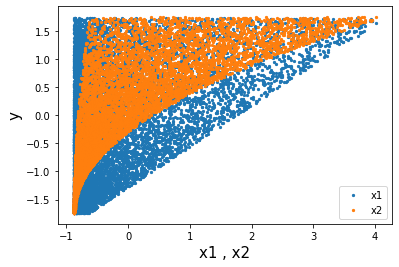

In [31]:
plt.scatter(y_gd, x1_gd, s=5, label = 'x1')
plt.scatter(y_gd, x2_gd, s=5, label = 'x2')
plt.legend(fontsize=15)
plt.xlabel('x1 , x2', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend()
plt.show()

In [32]:
x_gd = np.c_[np.ones(x1_gd.shape[0]),x1_gd, x2_gd]

In [33]:
alpha_gd = 0.0001   #learning rate
m_gd = y_gd.size  #no. of samples
theta_gd = np.random.rand(3)  #initializing theta with some random values

In [34]:
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []   #to record all cost values to this list
    theta_list = []  #to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    #we append some large value to the cost list
    i=0
    while run:
        prediction = np.dot(x, theta)   #predicted y values theta_0*x0+theta_1*x1
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:   #checking if the change in cost function is less than 10^(-9)
            run = False

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [35]:
prediction_list_gd, cost_list_gd, theta_list_gd = gradient_descent(x_gd, y_gd, m_gd, theta_gd, alpha_gd)
theta_gd = theta_list_gd[-1]

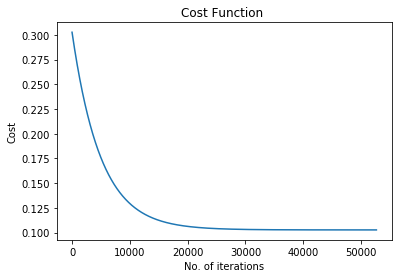

In [36]:
plt.title('Cost Function ')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_list_gd)
plt.show()

In [37]:
yp_gd = theta_gd[0] +theta_gd[1]*x_gd[:,1] + theta_gd[2]*x_gd[:,2]

In [38]:
MSE_equ_gd = ((yp_gd-y_gd)**2).mean()  #Using yp from equation of hyperplane


print('Mean Square Error on train data : {}'.format(round(MSE_equ_gd,3)))


Mean Square Error on train data : 0.205


##### test

In [39]:
new_data_gd = data.iloc [:2000 , :]
x1_test_gd = (new_data_gd['x1_test'] - new_data_gd['x1_test'].mean())/new_data_gd['x1_test'].std()
x2_test_gd = (new_data_gd['x2_test'] - new_data_gd['x2_test'].mean())/new_data_gd['x2_test'].std()
y_test_gd = (new_data_gd['y_test'] - new_data_gd['y_test'].mean())/new_data_gd['y_test'].std()
x1_test_gd = x1_test_gd.to_numpy()
x2_test_gd = x2_test_gd.to_numpy()
y_test_gd = y_test_gd.to_numpy()

In [40]:
x_test_gd = np.c_[np.ones(x1_test_gd.shape[0]),x1_test_gd, x2_test_gd]

In [41]:
alpha_test_gd = 0.0001   #learning rate
m_test_gd = y_test_gd.size  #no. of samples

theta_test_gd = np.random.rand(3)  #initializing theta with some random values

In [42]:
prediction_list_test_gd, cost_list_test_gd, theta_list_test_gd = gradient_descent(x_test_gd, y_test_gd, m_test_gd, theta_test_gd, alpha_test_gd)
theta_test_gd = theta_list_test_gd[-1]

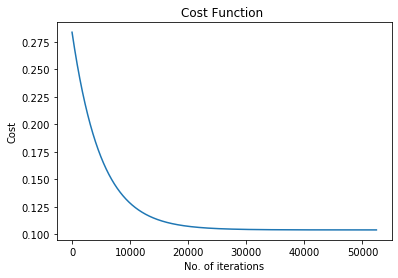

In [43]:
plt.title('Cost Function ')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_list_test_gd)
plt.show()

In [44]:
yp_test_gd = theta_test_gd[0] +theta_test_gd[1]*x_test_gd[:,1] + theta_test_gd[2]*x_test_gd[:,2]

In [45]:
MSE_equ_test_gd = ((yp_test_gd-y_test_gd)**2).mean()  #Using yp from equation of hyperplane
print('Mean Square Error on test data : {}'.format(round(MSE_equ_test_gd,3)))

Mean Square Error on test data : 0.208


In [46]:
print(y_test_gd)

[ 2.65923543 -0.13788072  0.43844931 ... -0.61123329  0.23593803
  0.83170405]


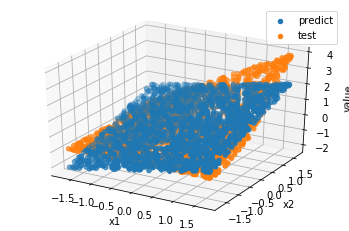

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = x1_test_gd
ys = x2_test_gd
zs = yp_test_gd
zzs = y_test_gd

ax.scatter(xs, ys, zs ,  label = "predict")
ax.scatter(xs, ys, zzs,label = "test")
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('value')

plt.show()

## SGD


In [48]:
train = (data[['x1', 'x2']] - data[['x1', 'x2']].mean())/data[['x1', 'x2']].std()
train = train.to_numpy()

y = (data['y'] - data['y'].mean())/data['y'].std()
y = y.to_numpy()
train_data=pd.DataFrame(train)
train_data['y']=y


In [49]:
new_data = data.iloc [:2000 , :]

x_test = (new_data[['x1_test', 'x2_test']] - new_data[['x1_test', 'x2_test']].mean())/new_data[['x1_test', 'x2_test']].std()
x_test = x_test.to_numpy()

y_test = (new_data['y_test'] - new_data['y_test'].mean())/new_data['y_test'].std()
y_test = y_test.to_numpy()

x_test=np.array(x_test)
y_test=np.array(y_test)
print(x_test[: , 1])


[ 1.34458712  0.86286158  0.89468365 ... -0.88427743  0.26772321
  1.36319991]


In [50]:
def SGD(train_data,learning_rate,n_iter,k,divideby):
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    cur_iter=1
    while(cur_iter<=n_iter): 
        temp=train_data.sample(k)
        y=np.array(temp['y'])
        x=np.array(temp.drop('y',axis=1))
        w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
        b_gradient=0
        for i in range(k):
            prediction=np.dot(w,x[i])+b
            w_gradient=w_gradient+(-2)*x[i]*(y[i]-(prediction))
            b_gradient=b_gradient+(-2)*(y[i]-(prediction))
        w=w-learning_rate*(w_gradient/k)
        b=b-learning_rate*(b_gradient/k)
        cur_iter=cur_iter+1
        learning_rate=learning_rate/divideby
    return w,b

In [51]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [52]:
w,b=SGD(train_data,learning_rate=1,n_iter=100,divideby=2,k=10)
y_pred_sgd=predict(x_test,w,b)


MSE_equ_test = ((y_pred_sgd-y_test)**2).mean()  #Using yp from equation of hyperplane
print('Mean Square on test data : {}'.format(round(MSE_equ_test,3)))


Mean Square on test data : 0.221


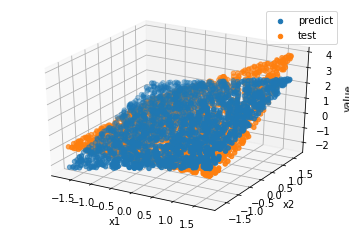

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


xs = x_test[: , 0]
ys = x_test[: , 1]
zs = y_pred_sgd
zzs = y_test
ax.scatter(xs, ys, zs ,  label = "predict")
ax.scatter(xs, ys, zzs,label = "test")
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('value')

plt.show()

## error on train and test data

### gd

In [54]:
print('Mean Square Error  on train data : {}'.format(round(MSE_equ_gd,3)))
print('Mean Square Error  on test data : {}'.format(round(MSE_equ_test_gd,3)))

Mean Square Error  on train data : 0.205
Mean Square Error  on test data : 0.208


### sgd

In [55]:
y_pred_tarin_sgd=predict(train,w,b)
MSE_equ_train = ((y_pred_tarin_sgd-y)**2).mean()
print('Mean Square Error on train data : {}'.format(round(MSE_equ_train,3)))
print('Mean Square Error on test data : {}'.format(round(MSE_equ_test,3)))

Mean Square Error on train data : 0.219
Mean Square Error on test data : 0.221


## diffrence between actual y_test and y_test prediction in GD

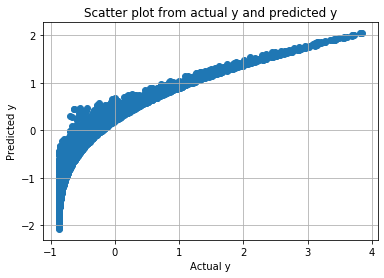

In [62]:
plt.scatter(y_test_gd,yp_test_gd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

## diffrence between actual y_test and y_test prediction in SGD

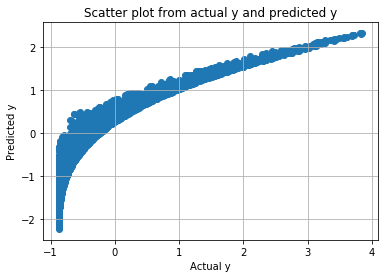

In [63]:
plt.scatter(y_test,y_pred_sgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

## diffrence between  y_test prediction in GD and y_test prediction in SGD


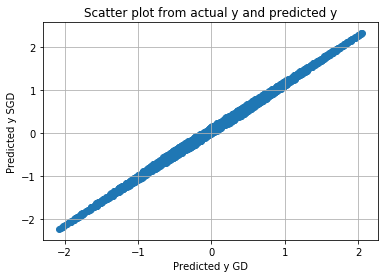

In [64]:
plt.scatter(yp_test_gd,y_pred_sgd)
plt.grid()
plt.xlabel('Predicted y GD')
plt.ylabel('Predicted y SGD')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

## diffrence between  y_test prediction in GD and y_test prediction in SGD in dataframe


In [65]:
diffrence = yp_test_gd - y_pred_sgd

In [69]:
df = pd.DataFrame(diffrence)
df.describe()


,0
count,2000.000000
mean,-0.060036
std,0.096251
min,-0.282116
25%,-0.127840
50%,-0.058869
75%,0.012880
max,0.164959


In [70]:
print(df)

             0
0    -0.239269
1    -0.025095
2    -0.084934
3    -0.108528
4     0.025607
...        ...
1995 -0.037764
1996 -0.033128
1997 -0.113853
1998 -0.116278
1999 -0.099345

[2000 rows x 1 columns]
